### Testing PatchBasedInference.py

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import torch
import torchio as tio
from radio.data import BrainAgingPredictionDataModule, PatchBasedInference
from radio.data.datautils import get_first_batch
from radio.data.datavisualization import plot_batch, plot_subjects

In [4]:
data = BrainAgingPredictionDataModule(
    root='/media/cerebro/Workspaces/Students/Eduardo_Diniz/Studies',
    data_dir='processed_data',
    step='step01_structural_processing',
    use_augmentation=False,
    use_preprocessing=False,
    batch_size=32,
    intensities=["T1", "FLAIR"],
    labels=[],
)
data.prepare_data()

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `dims` was deprecated in v1.5 and will be removed in v1.7.


In [5]:
data.setup()

DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.


In [6]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 496 subjects.
Validation: 123 subjects.
Test: 155 subjects.


#### Get a Train and a Test Batch

In [7]:
train_dataloader = data.train_dataloader()
val_dataloader = data.val_dataloader()
test_dataloader = data.test_dataloader()

In [8]:
train_batch = get_first_batch(train_dataloader)
test_batch = get_first_batch(test_dataloader)

In [9]:
print(f"Batch keys: {test_batch.keys()}")
print(f"Sample shape: {test_batch['T1']['data'].shape}")
print(f"Image keys: {test_batch['T1'].keys()}")
print(f"Subject IDs: {test_batch['subj_id']}")
print(f"Scan IDs: {test_batch['scan_id']}")

Batch keys: dict_keys(['subj_id', 'scan_id', 'T1', 'FLAIR'])
Sample shape: torch.Size([32, 1, 160, 192, 160])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])
Subject IDs: ['ABD_BS_0017', 'ABD_IH_0100', 'ABD_AJ_0140', 'ABD_SW_0027', 'ABD_AJ_0087', 'ABD_AJ_0242', 'ABD_SW_0049', 'ABD_SW_0119', 'ABD_SW_0048', 'ABD_SS_0071', 'ABD_SS_0010', 'ABD_AJ_0066', 'ABD_SW_0128', 'ABD_IH_0010', 'ABD_SS_0078', 'ABD_SW_0115', 'ABD_CN_0007', 'ABD_AJ_0160', 'ABD_BS_0030', 'ABD_IH_0068', 'ABD_SS_0043', 'ABD_AJ_0123', 'ABD_SW_0167', 'ABD_SW_0050', 'ABD_AJ_0152', 'ABD_CN_0008', 'ABD_IH_0086', 'ABD_SW_0072', 'ABD_AJ_0201', 'ABD_IH_0042', 'ABD_SS_0098', 'ABD_IH_0040']
Scan IDs: ['scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan001', 'scan002', 'scan001', 'scan002', 'scan002', 'scan001', 'scan001', 'scan001', 'scan001', 

#### Test ``overlap_mode = 'crop'``

In [10]:
model = torch.nn.Identity()
patch_size = (96, 96, 1)
patch_batch_size = 16
patch_overlap = (2, 2, 0)
intensities = ["T1", "FLAIR"]
overlap_mode = 'crop'

inference_module = PatchBasedInference(
    patch_size=patch_size,
    patch_batch_size=patch_batch_size,
    patch_overlap=patch_overlap,
    overlap_mode=overlap_mode,
)   

In [11]:
out_subjects = inference_module(
    test_batch,
    model,
    intensities=intensities,
)

In [12]:
print(f"Out_subjects: {out_subjects}")

Out_subjects: [Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Keys: ('subj_id', 'scan_id', 'T1', 'FLAIR'); images: 2), Subject(Ke

#### Plot Example Samples from Batches

Test Subject
Subject: 1


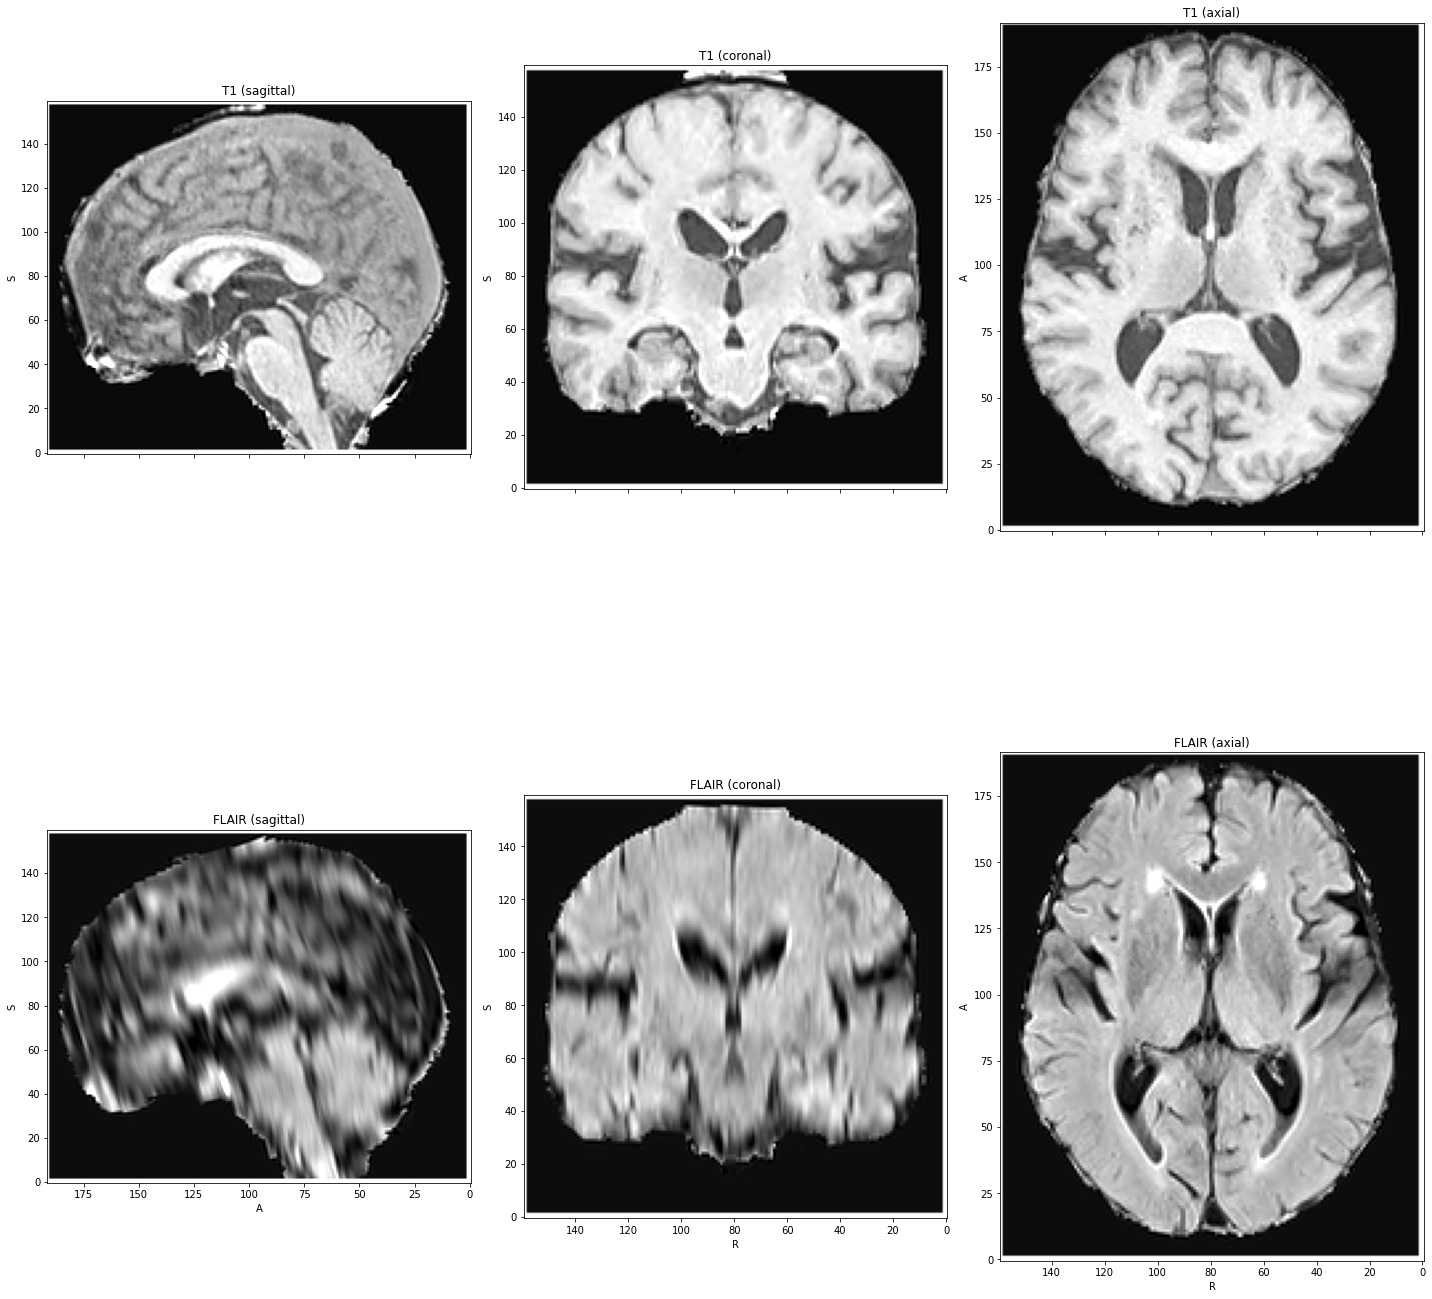



Inference
Subject: 1


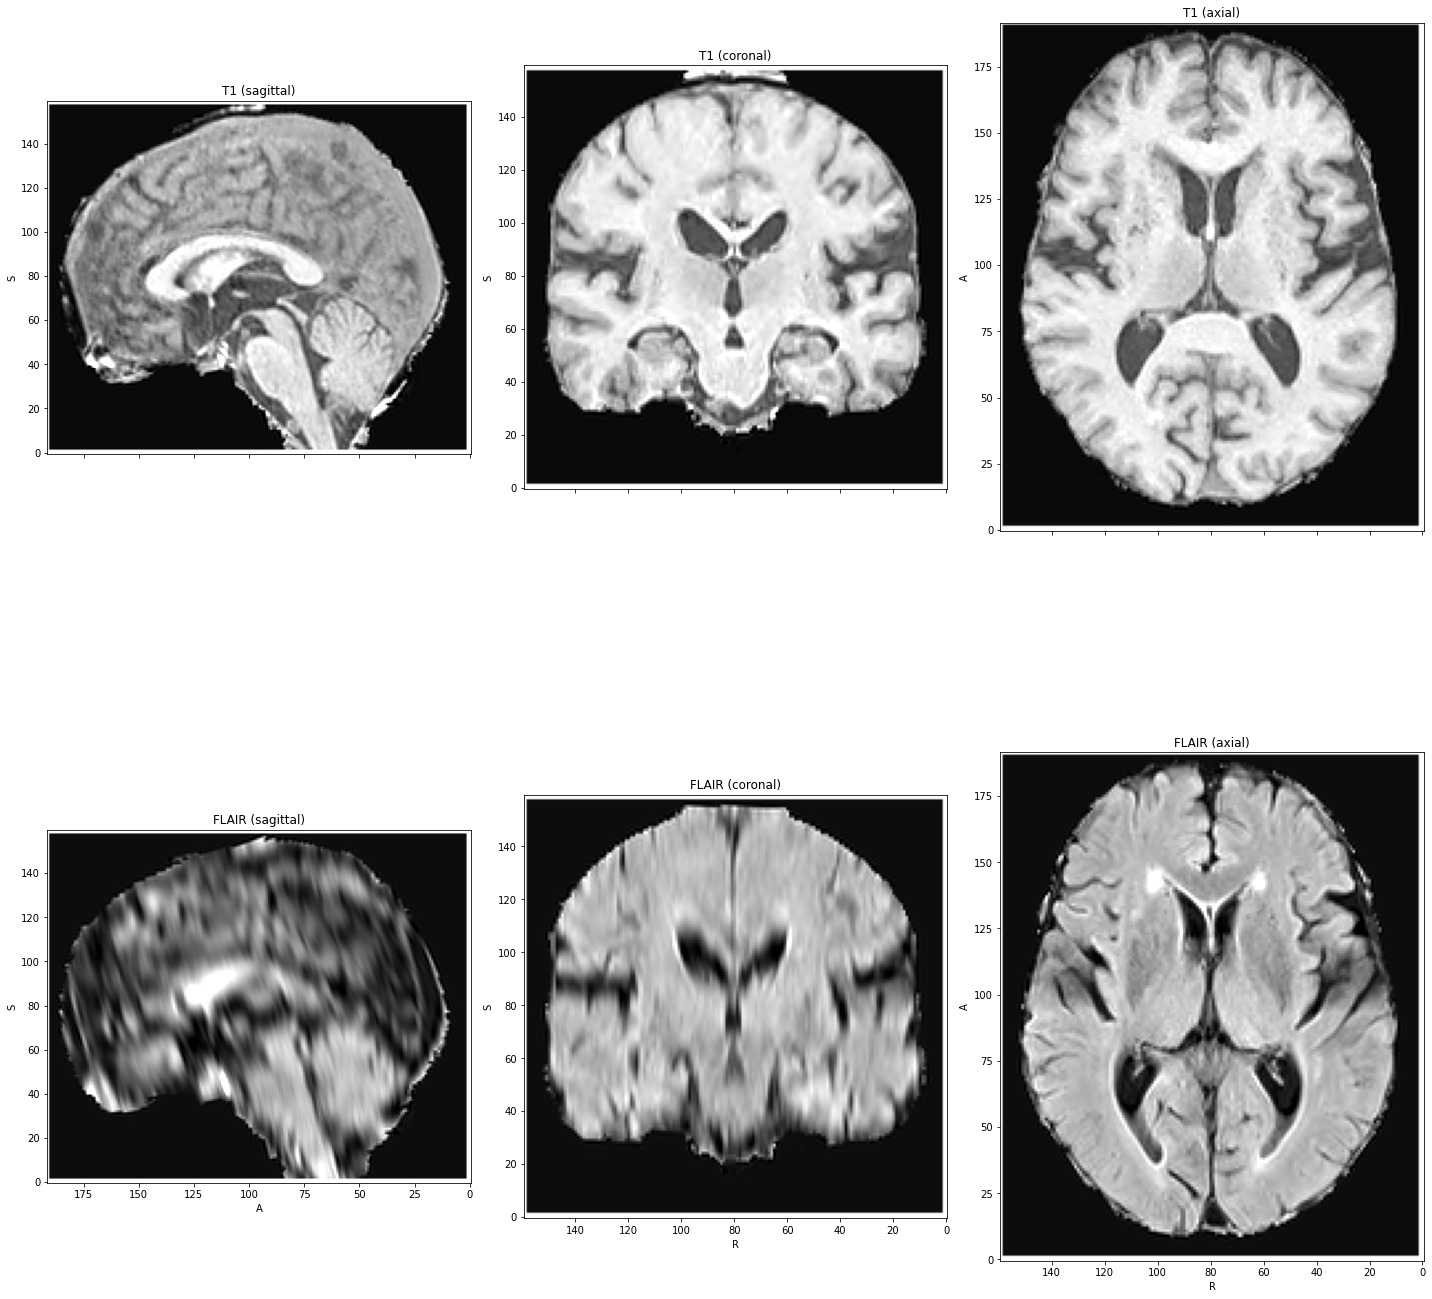

In [13]:
print("Test Subject")
plot_batch(test_batch, num_samples=1, random_samples=False)
print("Inference")
plot_subjects(out_subjects, num_samples=1, random_samples=False)